# Finding University Locations

This file retrieves the university coordinates for Universities in the BUEC points table csv.
Fist ensure you have the BUEC Point table downloaded as a csv without any additional text.
> Example: Spring 2020m Download as csv
> https://docs.google.com/spreadsheets/d/1gUDJJY2xEegFN3pNWS3e6_LrU1H_MeVN-MIZmzISLzg/edit?usp=sharing

In [1]:
import geopy
from geopy.geocoders import Nominatim

import pandas as pd
import numpy as np

import time
from os import path

The file locations below refer to location of the CSV files. Only the table file needs to exist for the program to run, the other two will be generated. If a coordinates file already exists it will check that file for corresponding coordinates to reduce number of location lookup calls.

In [2]:
table_file = r'.\csv\BUEC_table.csv'
coord_file = r'.\csv\Uni_Coords.csv'
comb_file = r'.\csv\Combined.csv'

In [3]:
table = pd.read_csv(table_file)
table.head()

,Rank,University,Total,Spring,Winter,CS:GO,Dota 2,FIFA,Hearthstone,League of Legends,Overwatch,Rainbow 6 (USL),Rocket League,Smash (Singles),Smash (Teams),Tekken (UFG),Pubg Mobile
0,1,University of Warwick,1623,755,868.0,223,286,33,0,297,203,14,465,40,0,62,0
1,2,Staffordshire University,1390,589,801.0,297,55,5,0,114,176,143,226,261,112,1,0
2,3,University of Southampton,1374,625,749.0,361,278,13,118,195,98,25,113,123,49,0,1
3,4,University of Portsmouth,1257,649,608.0,211,73,34,0,174,250,68,358,79,5,4,1
4,5,University of Birmingham,1043,472,571.0,47,118,0,135,70,177,1,222,173,84,16,0


In [4]:
# Check if Position data previously existed and create a combined dataframe
if path.exists(coord_file):
    coords = pd.read_csv(coord_file)
    comb = pd.merge(table, coords, on='University', how='left')
else:
    comb = table.copy()
    comb['Latitude'] = np.nan
    comb['Longitude'] = np.nan
    
comb.head()

,Rank,University,Total,Spring,Winter,CS:GO,Dota 2,FIFA,Hearthstone,League of Legends,Overwatch,Rainbow 6 (USL),Rocket League,Smash (Singles),Smash (Teams),Tekken (UFG),Pubg Mobile,Longitude,Latitude
0,1,University of Warwick,1623,755,868.0,223,286,33,0,297,203,14,465,40,0,62,0,-1.560425,52.379313
1,2,Staffordshire University,1390,589,801.0,297,55,5,0,114,176,143,226,261,112,1,0,-2.080223,52.813168
2,3,University of Southampton,1374,625,749.0,361,278,13,118,195,98,25,113,123,49,0,1,-1.394910,50.935203
3,4,University of Portsmouth,1257,649,608.0,211,73,34,0,174,250,68,358,79,5,4,1,-1.097175,50.794403
4,5,University of Birmingham,1043,472,571.0,47,118,0,135,70,177,1,222,173,84,16,0,-1.929640,52.450313


In [5]:
def get_location(university):
    time.sleep(1) # To prevent API abuse
    geolocator = Nominatim(user_agent="UniEsportsLocator")
    location = geolocator.geocode(university+', United Kingdom')
    if location == None:
        print('Manual Lookup of '+university)
        lat = input('Latitude: ')
        lon = input('Longitude: ')
        return lat, lon
    return location.latitude, location.longitude
get_location('University of Exeter')

(50.7369302, -3.536476717021671)

In [6]:
# Get missing position data
for index, row in comb.iterrows():
    if np.isnan(row['Latitude']) or np.isnan(row['Longitude']):
        lat, lon = get_location(row['University'])
        comb.at[index,'Latitude'] = lat
        comb.at[index,'Longitude'] = lon
        
comb.head()

,Rank,University,Total,Spring,Winter,CS:GO,Dota 2,FIFA,Hearthstone,League of Legends,Overwatch,Rainbow 6 (USL),Rocket League,Smash (Singles),Smash (Teams),Tekken (UFG),Pubg Mobile,Longitude,Latitude
0,1,University of Warwick,1623,755,868.0,223,286,33,0,297,203,14,465,40,0,62,0,-1.560425,52.379313
1,2,Staffordshire University,1390,589,801.0,297,55,5,0,114,176,143,226,261,112,1,0,-2.080223,52.813168
2,3,University of Southampton,1374,625,749.0,361,278,13,118,195,98,25,113,123,49,0,1,-1.394910,50.935203
3,4,University of Portsmouth,1257,649,608.0,211,73,34,0,174,250,68,358,79,5,4,1,-1.097175,50.794403
4,5,University of Birmingham,1043,472,571.0,47,118,0,135,70,177,1,222,173,84,16,0,-1.929640,52.450313


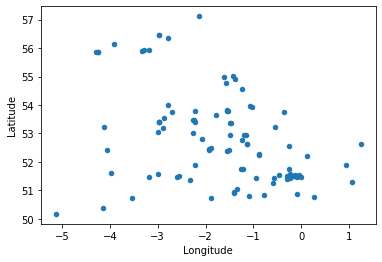

In [7]:
comb.plot.scatter(x="Longitude", y="Latitude")

In [8]:
# Save the combined dataframe and coordinates
comb.to_csv(comb_file, index=False)

comb[["University","Longitude","Latitude"]].to_csv(coord_file, index=False)